请输入非负整数数组（各元素之间用空格隔开）：
6 5 4 3 2 2 2
此非负整数组是图序列！


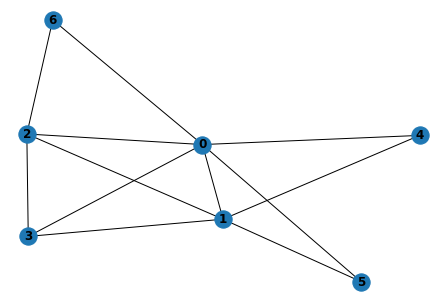

In [2]:
#  图序列判定程序，输入非负整数组，判断其是否为图序列，如果是，会将图画出来。

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


# 非负整数组输入
print('请输入非负整数数组（各元素之间用空格隔开）：')
Seq = input()
Seqlist = Seq.split(" ")
Seqlist = [int(Seqlist[i]) for i in range(len(Seqlist))]
Seqlist.sort(reverse=True)  # 原始值，用于邻接矩阵计算
Seqlist_Jud = Seqlist[:]  # 临时值，用于图序列判定

# 度序列判定
Sum = 0
for ele in range(len(Seqlist)):
    Sum = Sum + Seqlist[ele]
if Sum % 2 == 1:
    G_HelpFlag = 0  # 度序列标志位，先进行度序列判定，进而一定程度减少复杂度
    print('非负整数不是度序列，更不可能是图序列')
else:
    # 图序列判断
    G_Flag = 1  # 若为图序列，此标志位为1
    for k in range(len(Seqlist) - 1):
        Seqlist_Jud.sort(reverse=True)
        First_element = Seqlist_Jud[0]
        del Seqlist_Jud[0]
        Seqlist_Jud.sort(reverse=True)
        if First_element > len(Seqlist_Jud):
            G_Flag = 0
            print('此非负整数组不是图序列！')
            break
        for i in range(First_element):
            Seqlist_Jud[i] = Seqlist_Jud[i] - 1
            if Seqlist_Jud[i] < 0:
                G_Flag = 0
                break
        if G_Flag == 0:
            print('此非负整数组不是图序列！')
            break
    if Seqlist_Jud[0] != 0:
        G_Flag = 0
        print('此非负整数组不是图序列！')
    if G_Flag:
        print('此非负整数组是图序列！')

    # 计算邻接矩阵并画图
    if G_Flag:
        Mat_A = np.zeros((len(Seqlist), len(Seqlist)))  # 邻接矩阵初始化
        max_deg = np.zeros(len(Seqlist))  # 对每个结点已经连的边数做记录
        for m in range(len(Seqlist)):
            for n in range(m + 1, m + 1 + Seqlist[m]):
                if max_deg[m] >= Seqlist[m]:
                    break
                if max_deg[n] >= Seqlist[n]:
                    continue
                Mat_A[m, n] = 1
                max_deg[m] = max_deg[m] + 1
                max_deg[n] = max_deg[n] + 1
        for n in range(len(Seqlist)):
            for m in range(0, n):
                Mat_A[n, m] = Mat_A[m, n]

        #  画图
        G = nx.Graph()
        for m in range(len(Mat_A)):
            for n in range(len(Mat_A)):
                if Mat_A[m, n] != 0:
                    G.add_edge(m, n)
        nx.draw(G, with_labels=True, font_weight='bold')
        plt.show()